## Data Exploration and Preprocessing

### Importing Necessary Libraries

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

### Reading the Data

In [26]:
Data = pd.read_csv('bank.csv')
Data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### Understanding Data

In [27]:
Data.shape

(11162, 17)

Our data consists of 17 columns i.e 17 variables including 1 target variable 'deposit' and 11162 rows containing records of individuals. The following project focuses on the analysis of a dataset of Bank Marketing which contains data or information about customers and aims to get useful insights from the data and predict if a new customer will accept a deposit offer or not. 

In [79]:
Data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'pdays', 'previous',
       'poutcome', 'deposit'],
      dtype='object')

Attributes Description:

age : Age of customer

job : Job Type 

marital : Marital status

education : Education level of customer

default :  Does customer have credit in default?

balance : Balance of the individual

housing : Does customer have housing loan?

loan : Does customer have personal loan?

contact : Contact communication type

day :  Last contact day of the week 

month :  Last contact month of the year

duration : last contact duration, in seconds

campaign : Number of contacts performed during this campaign and for this client

pdays : Number of days that passed by after the client was last contacted from a previous campaign

previous : Number of contacts performed before this campaign and for this client

poutcome : outcome of the previous marketing campaign 

deposit : Has the client subscribed a term deposit?

In [28]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


There are 10 categorical variables and 7 numerical variables. Since there is 11162 Non-null values in all columns we can assume that the data does not contain null values.

In [29]:
Data.duplicated().sum()

0

There are no duplicate values in our dataset

In [30]:
Data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


Some first insights on the data: Medium age is 41 years old whereas minimum age is 18 years and maximum age is 95 years old. The std deviation of Balance looks high around 3225 as compared to the mean 1528. Campaign look balanced as its mean value is close to it's standard deviation. The duration column should be dropped since it includes an information which cannot be known before the call to the client.

In [31]:
Data.drop('duration', axis=1, inplace = True)

In [32]:
Data['deposit'].value_counts()/Data.shape[0]*100

deposit
no     52.616019
yes    47.383981
Name: count, dtype: float64

Data is balanced since the difference between the total number of yes and no is not huge.

### Exploring the data 

In [33]:
num = Data.select_dtypes('int64')
cat = Data.select_dtypes('object')
print('Numerical Columns', num.columns)
print('Categorical Columns', cat.columns)

Numerical Columns Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous'], dtype='object')
Categorical Columns Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')


We are first divinding our dataset into numerical and categorical columns

<Axes: xlabel='age', ylabel='Count'>

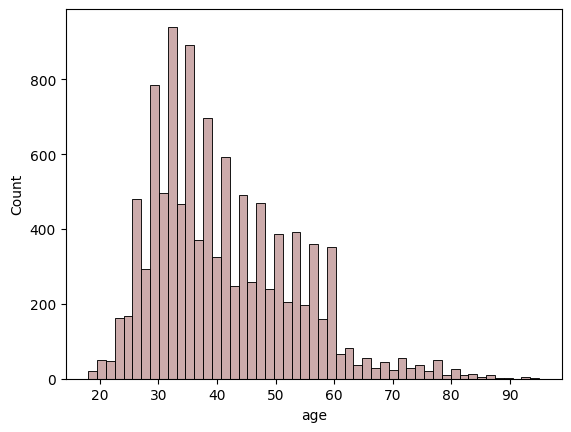

In [62]:
sns.histplot(x = 'age', data = Data, color='rosybrown')

According to our observation, we can see that maximum people's age lie between 30-40s.

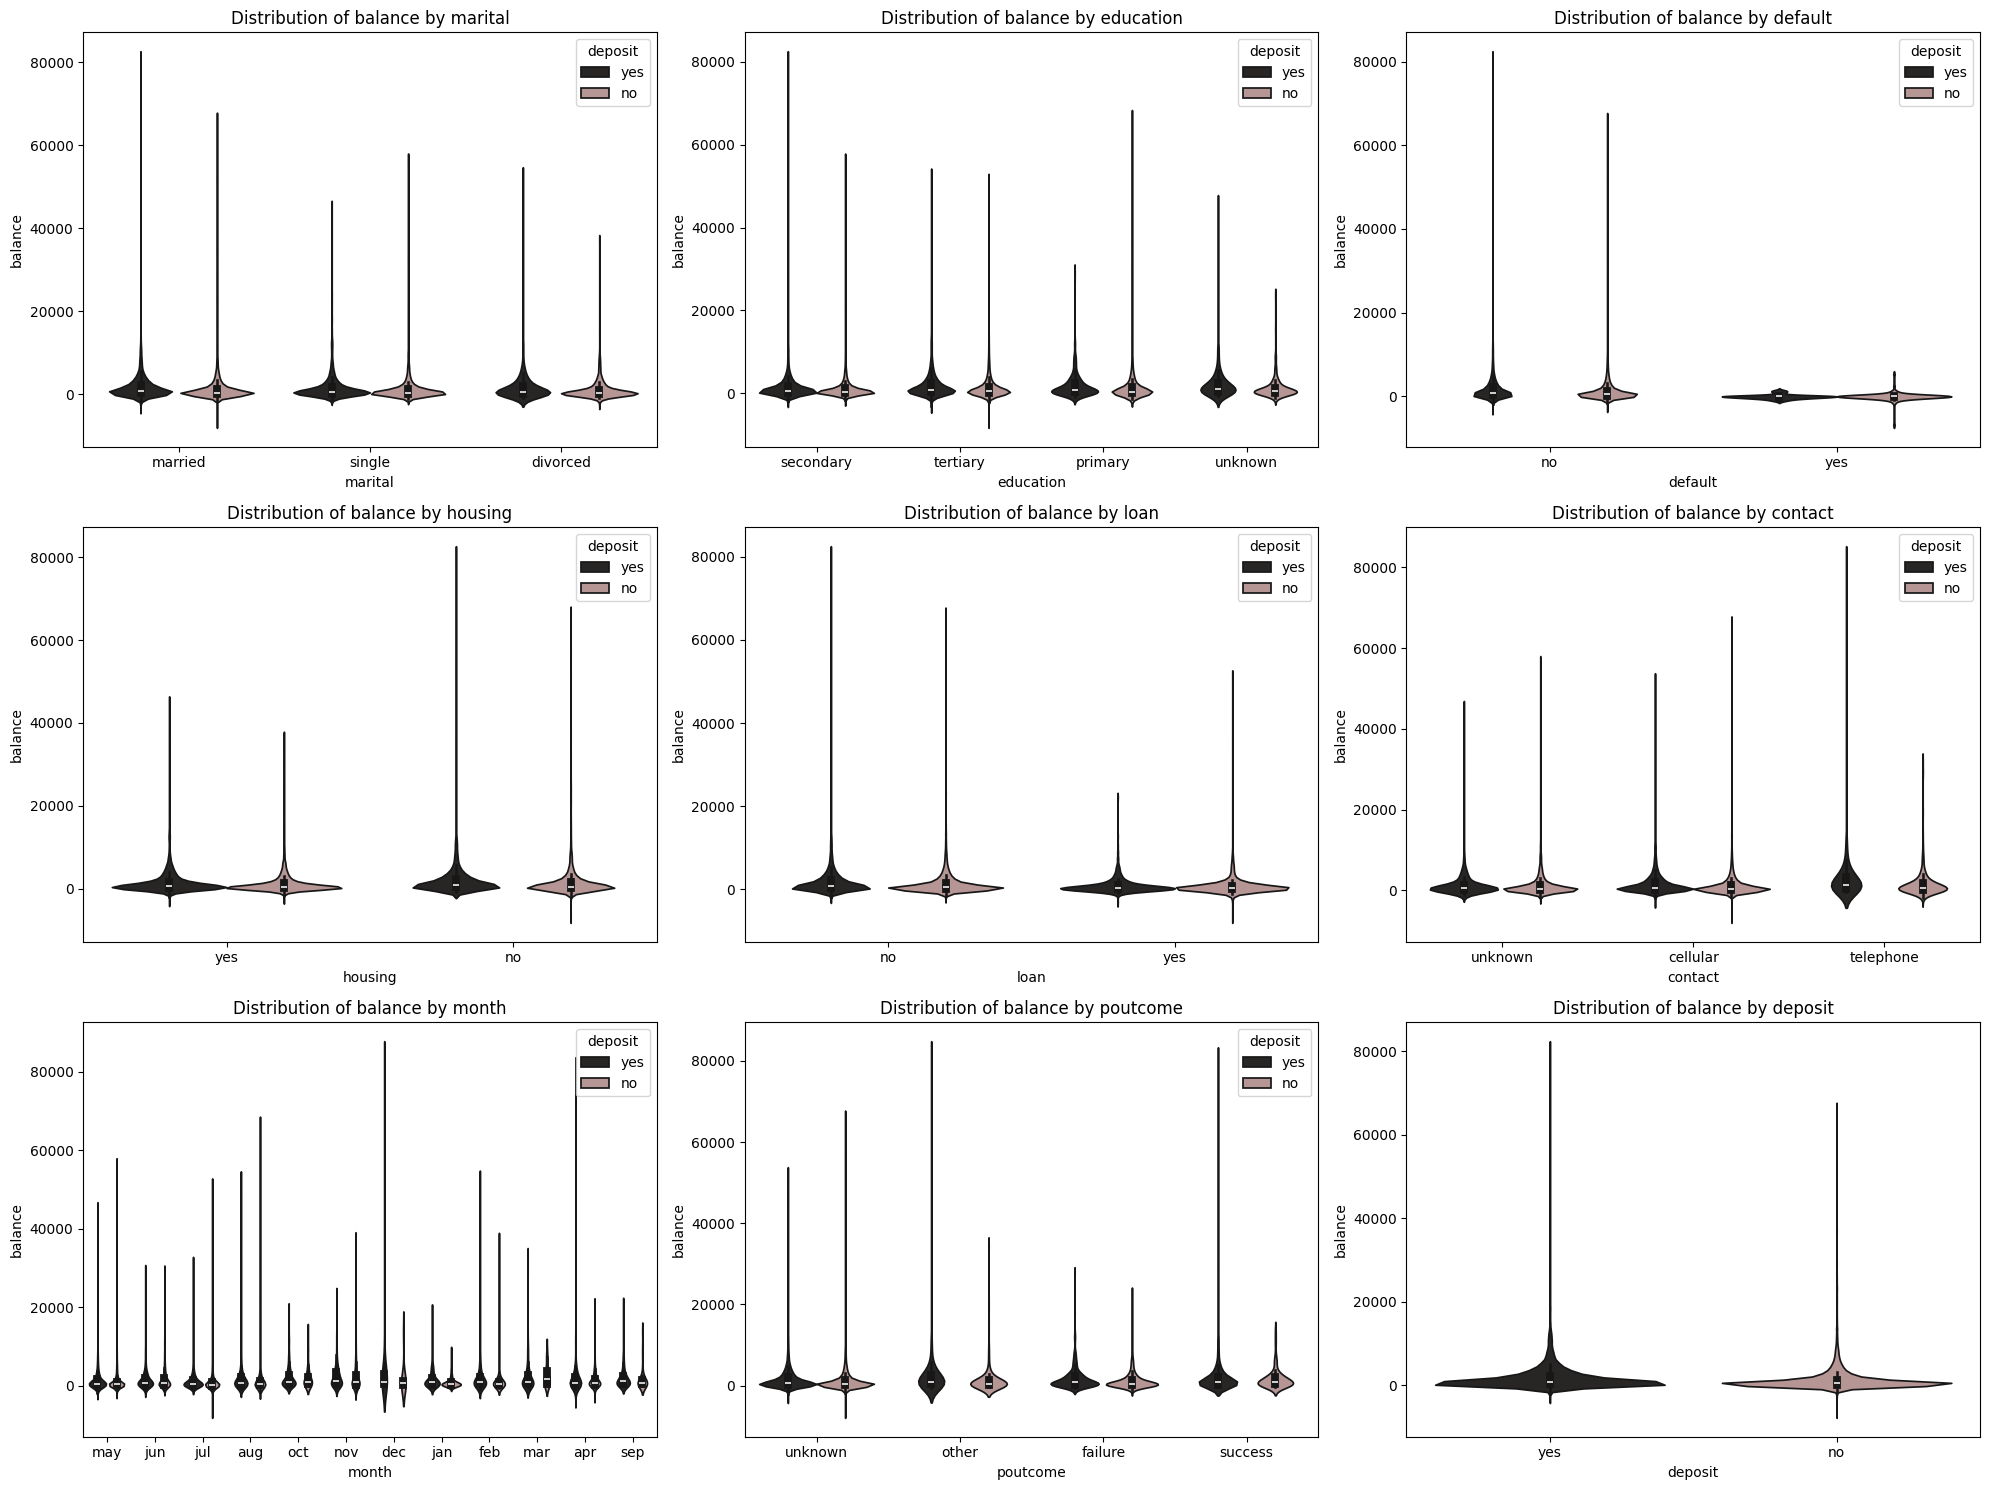

In [81]:
fig, axes = plt.subplots(3,3, figsize=(20,15))
fig.subplots_adjust(hspace=0.5)
for i, fea in enumerate(cat.iloc[:,1:10]):
    row, col = i // 3, i % 3 
    sns.violinplot(x = fea, y = 'balance', hue = 'deposit', data = Data, palette='dark:rosybrown', ax = axes[row, col])
    axes[row, col].set_title(f"Distribution of balance by {fea}")
plt.tight_layout()
plt.show()

After exploring balance of individuals on the basis of categories they belong to versus categorical columns, we can see that married people often have higher balance and tend to subscribe for deposit rather than singles followed by divorced people. Similarly, secondary education sector have have higher balance and are often inclined to opt for deposit followed by tertiary, unknown sector and lastly primary. We also note that primary sector have higher chances of not subscribing for deposit account as compared to other sectors. It seems that more customers have subscribed for deposit if they have not subscribed for housing loan, and interestingly it is the same for personal loan. If the customer has not subscribed for personal loan, they tend to subscribe for deposit more. Also, an observable insight is that people tend to have higher balance by the end of year in December or in April which is usually the start of academic year in schools. Overall, we can also conclude by remarking that customers with higher balance tend to subscribe for deposit more.

In [82]:
fig = make_subplots(rows=2, cols=5,
                    specs=[[{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'}],
                           [{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'},{'type':'domain'}]],
                     subplot_titles=[i for i in cat])
RosyBrown = ['rgb(237, 229, 207)','rgb(224, 194, 162)','rgb(211, 156, 131)','rgb(193, 118, 111)','rgb(166, 84, 97)','rgb(156, 63, 93)',
                      'rgb(129, 55, 83)','rgb(112, 40, 74)','rgb(84, 31, 63)','rgb(89, 13, 31)','rgb(60, 9, 17)','rgb(250, 249, 246)']
for i, fea in enumerate(cat.columns):
    fig.add_trace(go.Pie(labels = Data[fea].value_counts().index.tolist(), values = Data[fea].value_counts().tolist(), name = fea, marker_colors = RosyBrown),
                   row = i // 5 + 1, col = i % 5 + 1)
    fig.update_traces(hoverinfo='label+percent+name', textinfo='none')
    fig.update_layout(title_text='Pie plot for:', height = 900)
fig.show()
#Another way to plot pie charts
#for i in cat:
#    fig = px.pie(Data, values = np.ones(11162), names = i, title = f"Pie Plot for {i}", width = 700, height = 450 , color_discrete_sequence = px.colors.sequential.Brwnyl)
#    fig.show(renderer = 'notebook')''' 

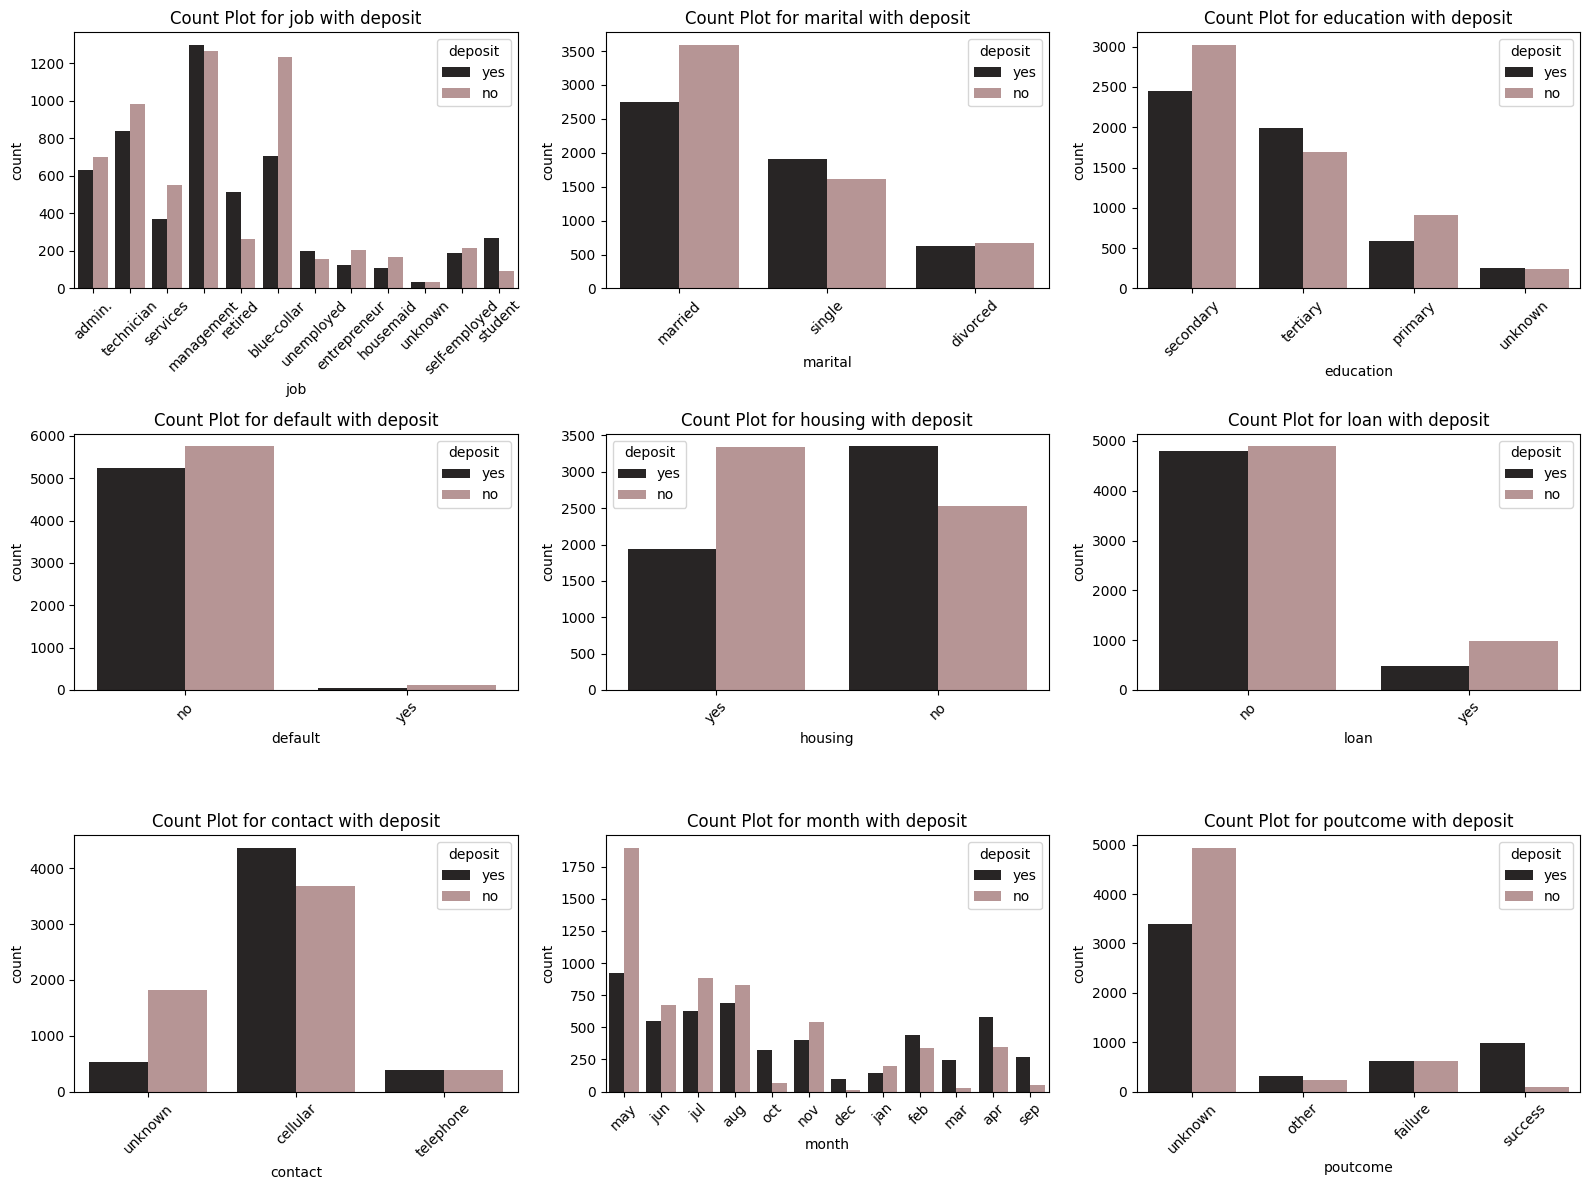

In [70]:
fig, axes = plt.subplots(3,3, figsize=(16,12))
fig.subplots_adjust(hspace=0.5)
for i, fea in enumerate(cat.iloc[:,0:9]):
    row, col = i // 3, i % 3 
    ax = sns.countplot(x=fea, hue='deposit', data=Data, palette = 'dark:rosybrown', ax=axes[row, col])
    for tick in ax.get_xticklabels():
        tick.set_rotation(45)
    axes[row, col].set_title(f"Count Plot for {fea} with deposit")
plt.tight_layout()
plt.show()

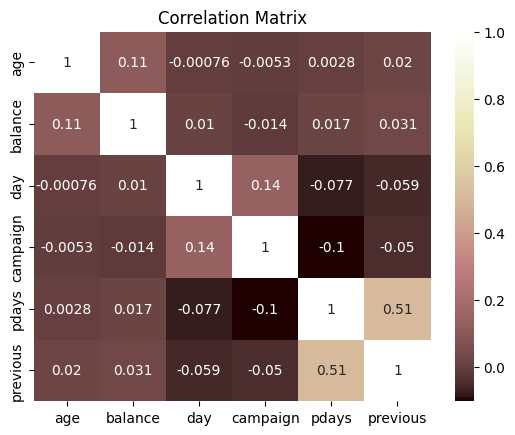

In [ ]:
sns.heatmap(num.corr(),annot =True, cmap='pink')
plt.title('Correlation Matrix')
plt.show()